In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import multiprocessing
from torch import autograd
from fastai.transforms import TfmType
from fasterai.transforms import *
from fastai.conv_learner import *
from fasterai.images import *
from fasterai.dataset import *
from fasterai.visualize import *
from fasterai.callbacks import *
from fasterai.loss import *
from fasterai.modules import *
from fasterai.wgan import *
from fasterai.generators import *
from fastai.torch_imports import *
from pathlib import Path
from itertools import repeat
import tensorboardX
torch.cuda.set_device(3)
plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True


In [3]:
IMAGENET = Path('data/imagenet/ILSVRC/Data/CLS-LOC/train')
CIFAR10 = Path('data/cifar10/train')

proj_id = 'bwc_withattn_sn_small'
TENSORBOARD_PATH = Path('data/tensorboard/' + proj_id)

gpath = IMAGENET.parent/('bwc_withattn_sn_small_gen_64.h5')


keep_pct=1.0
bs=16
sz=64

c_lr=5e-4
c_lrs = np.array([c_lr,c_lr,c_lr,c_lr])

g_lr=1e-4
g_lrs = np.array([g_lr/10000,g_lr/100,g_lr])

torch.backends.cudnn.benchmark=True

## Training

In [4]:
netG = Unet34(nf_factor=1, self_attention=True, sn=True, leakyReLu=False).cuda()
#netGVis = ModelVisualizationHook(TENSORBOARD_PATH, netG, 'netG')
load_model(netG, gpath)
netG = netG.eval()

#netD = DCCritic(ni=3, nf=32, scale=64, sn=sn, self_attention=True).cuda()
#netDVis = ModelVisualizationHook(TENSORBOARD_PATH, netD, 'netD')
#load_model(netD, dpath)

In [5]:
x_tfms = [BlackAndWhiteTransform()]
data_loader = ImageGenDataLoader(sz=sz, bs=bs, path=IMAGENET, random_seed=42, x_noise=False,
            keep_pct=keep_pct, x_tfms=x_tfms)

md = data_loader.get_model_data()

In [6]:
#trainer = WGANTrainer(netD=netD, netG=netG, md=md, bs=bs, sz=sz, dpath=dpath, gpath=gpath, genloss_fns=[FeatureLoss(multiplier=1e5)], citers=1, sn=sn)
#trainerVis = WganVisualizationHook(TENSORBOARD_PATH, trainer, 'trainer')

In [7]:
#netG.freeze_to(1)
#trainer.train(lrs_critic=c_lrs, lrs_gen=g_lrs, clr_critic=(1,8), clr_gen=(1,8), cycle_len=1, epochs=1)

In [20]:
vis = ModelImageVisualizer(default_sz=64)

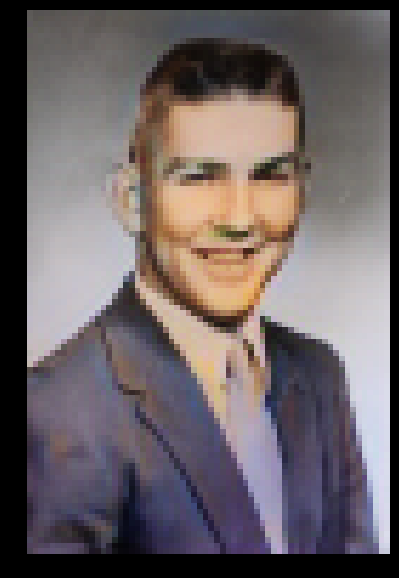

In [21]:
vis.plot_transformed_image("data/uploaded_images/overmiller.jpg", netG, md.val_ds, tfms=x_tfms)

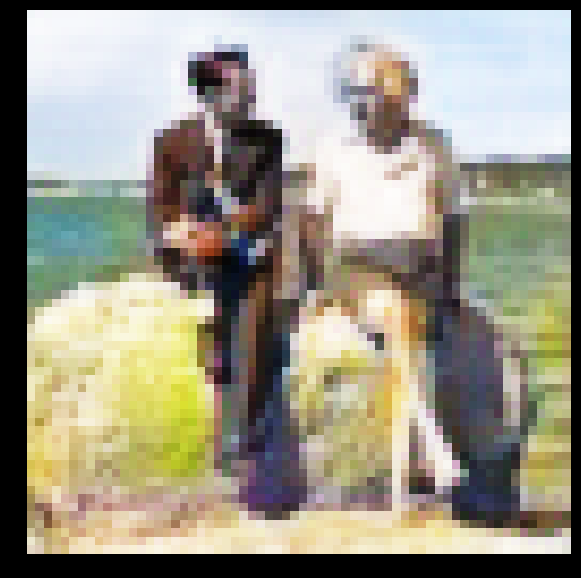

In [22]:
vis.plot_transformed_image("data/uploaded_images/einstein_beach.jpg", netG, md.val_ds, tfms=x_tfms)

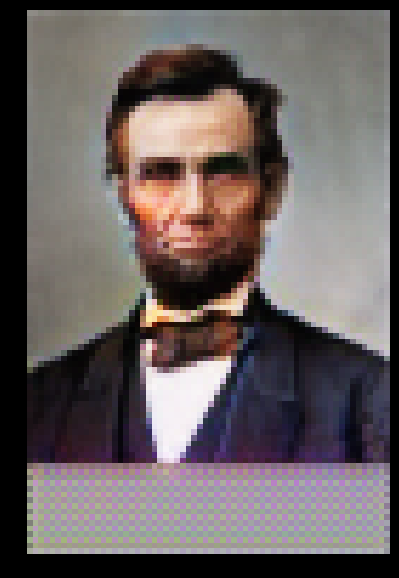

In [23]:
vis.plot_transformed_image("data/uploaded_images/abe.jpg", netG, md.val_ds, tfms=x_tfms)

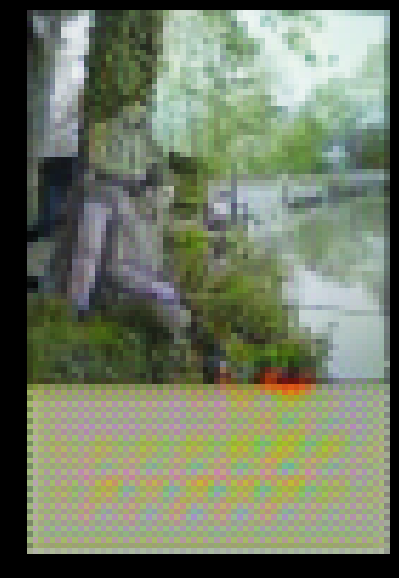

In [24]:
vis.plot_transformed_image("data/uploaded_images/airmen1943.jpg", netG, md.val_ds, tfms=x_tfms)

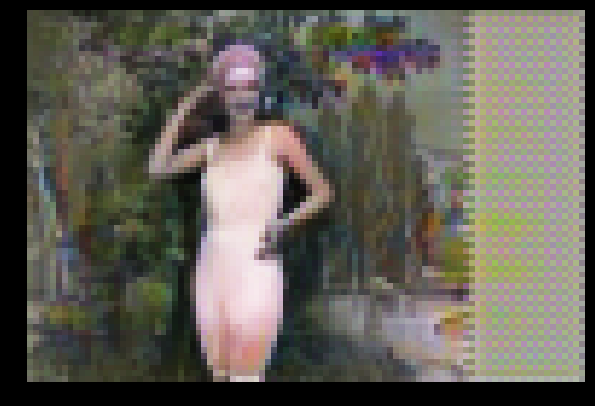

In [25]:
vis.plot_transformed_image("data/uploaded_images/20sWoman.jpg", netG, md.val_ds, tfms=x_tfms)

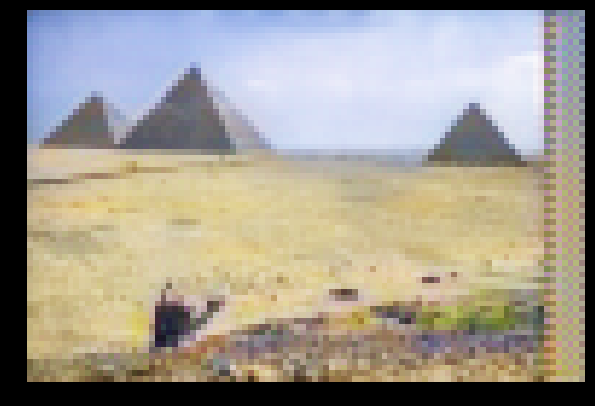

In [26]:
vis.plot_transformed_image("data/uploaded_images/egypt-1.jpg", netG, md.val_ds)

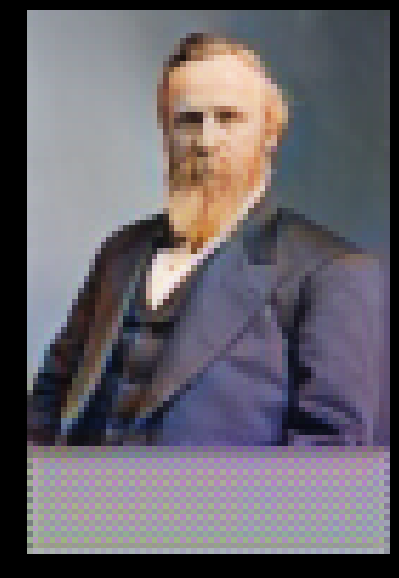

In [27]:
vis.plot_transformed_image("data/uploaded_images/Rutherford_Hayes.jpg", netG, md.val_ds, tfms=x_tfms)

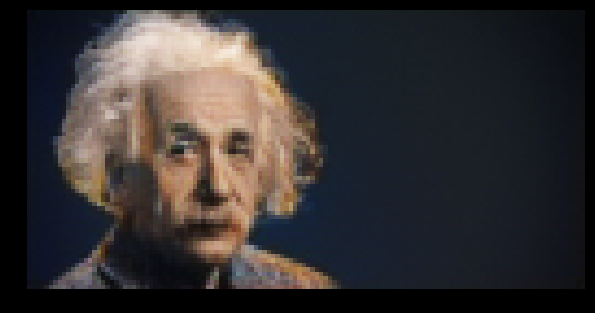

In [28]:
vis.plot_transformed_image("data/uploaded_images/einstein_portrait.jpg", netG, md.val_ds, tfms=x_tfms)

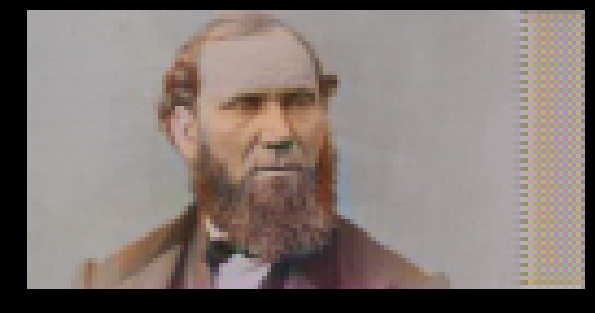

In [29]:
vis.plot_transformed_image("data/uploaded_images/pinkerton.jpg", netG, md.val_ds, tfms=x_tfms)

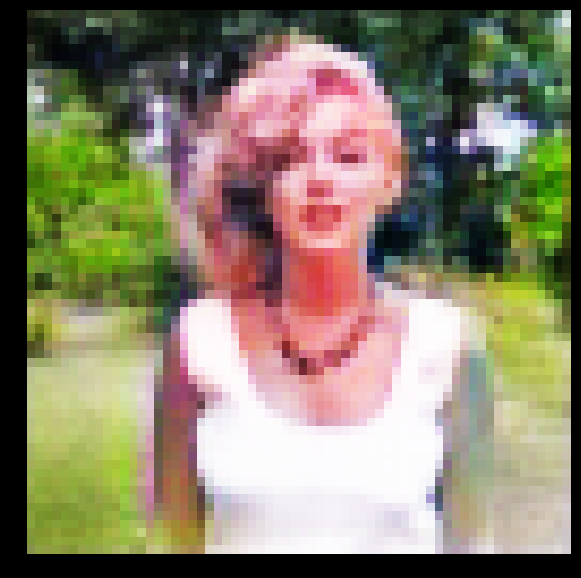

In [30]:
vis.plot_transformed_image("data/uploaded_images/marilyn_woods.jpg", netG, md.val_ds, tfms=x_tfms)

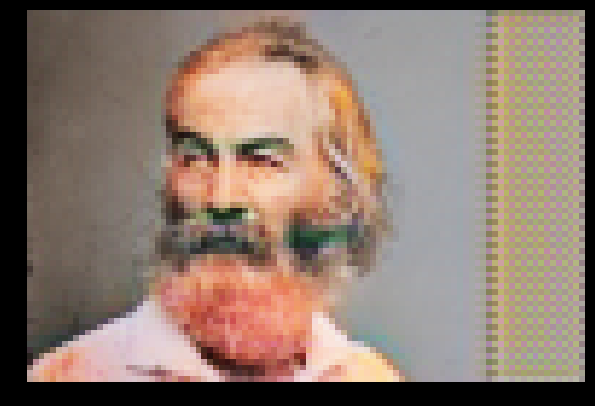

In [31]:
vis.plot_transformed_image("data/uploaded_images/WaltWhitman.jpg", netG, md.val_ds, tfms=x_tfms)

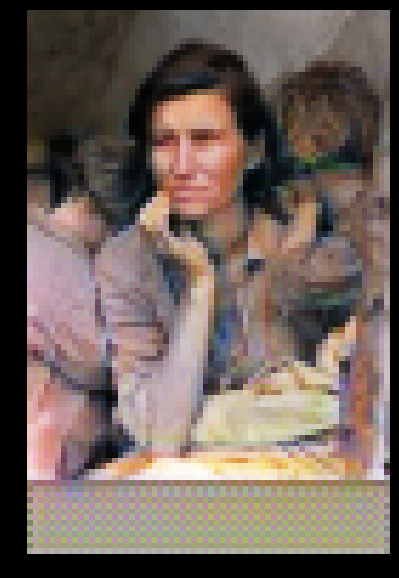

In [32]:
vis.plot_transformed_image("data/uploaded_images/dorothea-lange.jpg", netG, md.val_ds, tfms=x_tfms)

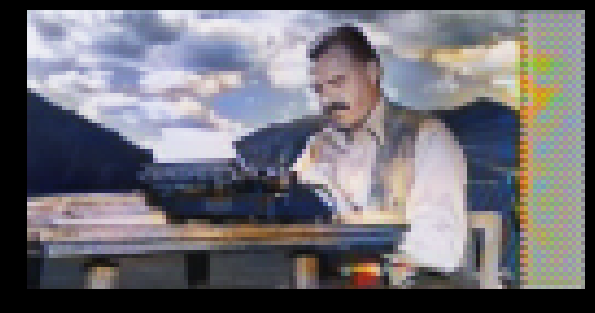

In [33]:
vis.plot_transformed_image("data/uploaded_images/Hemmingway2.jpg", netG, md.val_ds, tfms=x_tfms)

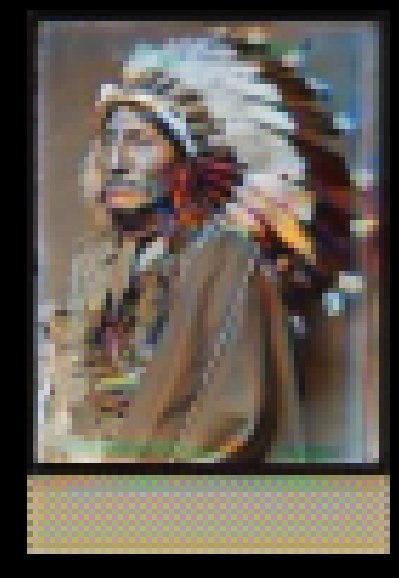

In [34]:
vis.plot_transformed_image("data/uploaded_images/Chief.jpg", netG, md.val_ds, tfms=x_tfms)

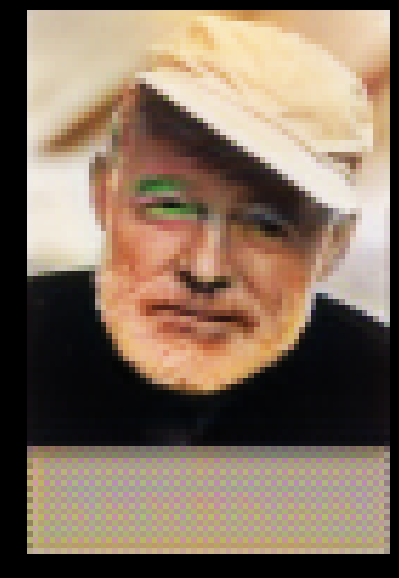

In [35]:
vis.plot_transformed_image("data/uploaded_images/hemmingway.jpg", netG, md.val_ds, tfms=x_tfms)

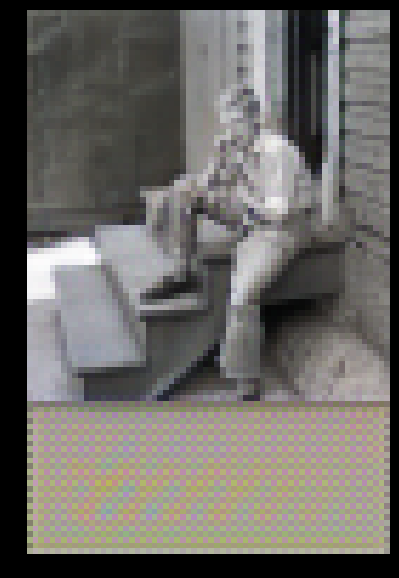

In [36]:
vis.plot_transformed_image("data/uploaded_images/smoking_kid.jpg", netG, md.val_ds, tfms=x_tfms)

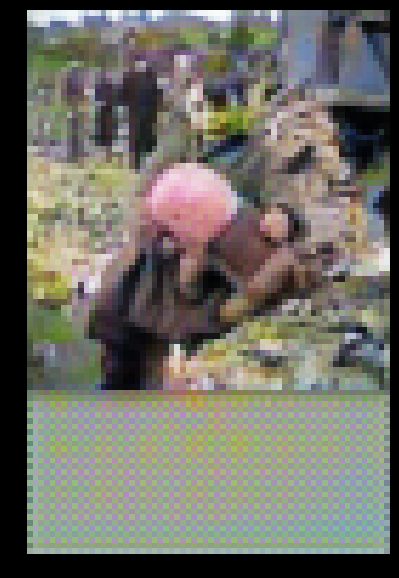

In [37]:
vis.plot_transformed_image("data/uploaded_images/teddy_rubble.jpg", netG, md.val_ds, tfms=x_tfms)

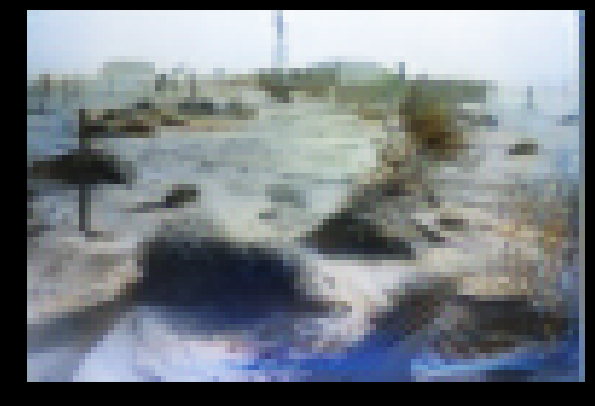

In [38]:
vis.plot_transformed_image("data/uploaded_images/dustbowl_2.jpg", netG, md.val_ds, tfms=x_tfms)

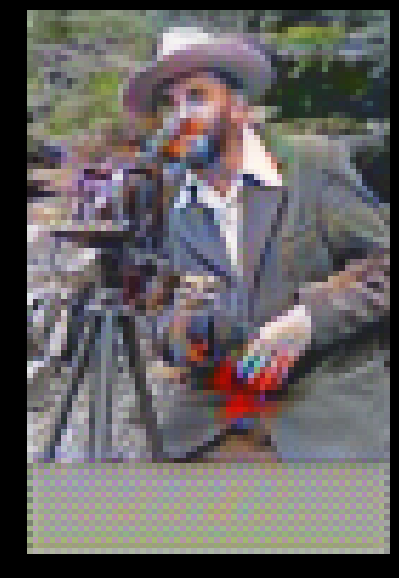

In [39]:
vis.plot_transformed_image("data/uploaded_images/camera_man.jpg", netG, md.val_ds, tfms=x_tfms)

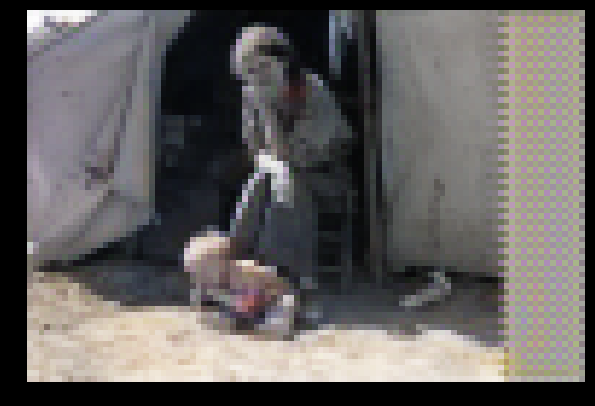

In [40]:
vis.plot_transformed_image("data/uploaded_images/migrant_mother.jpg", netG, md.val_ds, tfms=x_tfms)

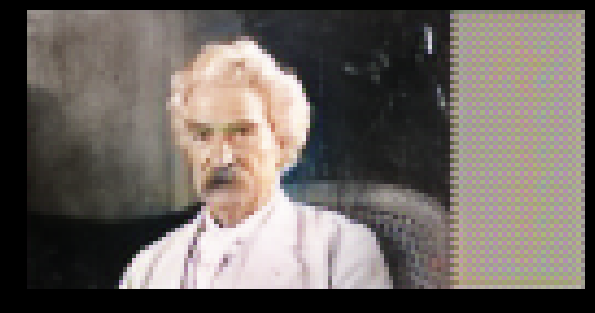

In [41]:
vis.plot_transformed_image("data/uploaded_images/marktwain.jpg", netG, md.val_ds, tfms=x_tfms)

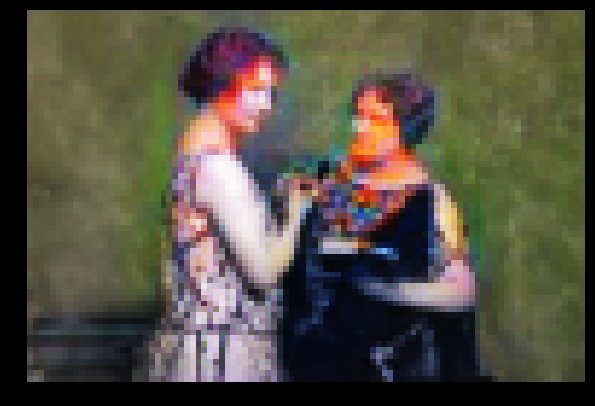

In [42]:
vis.plot_transformed_image("data/uploaded_images/HelenKeller.jpg", netG, md.val_ds, tfms=x_tfms)

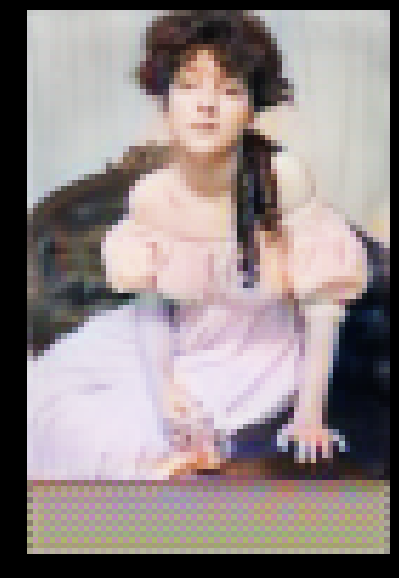

In [43]:
vis.plot_transformed_image("data/uploaded_images/Evelyn_Nesbit.jpg", netG, md.val_ds, tfms=x_tfms)

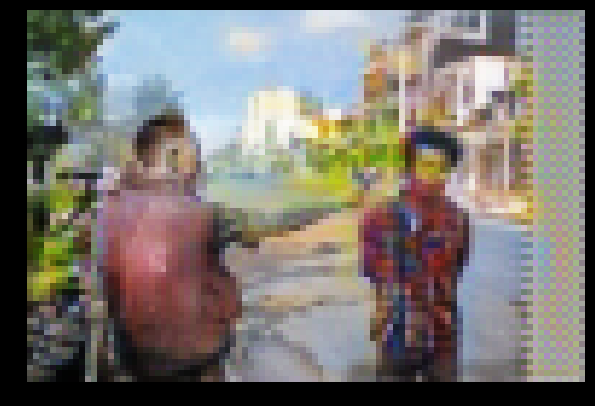

In [44]:
vis.plot_transformed_image("data/uploaded_images/Eddie-Adams.jpg", netG, md.val_ds, tfms=x_tfms)

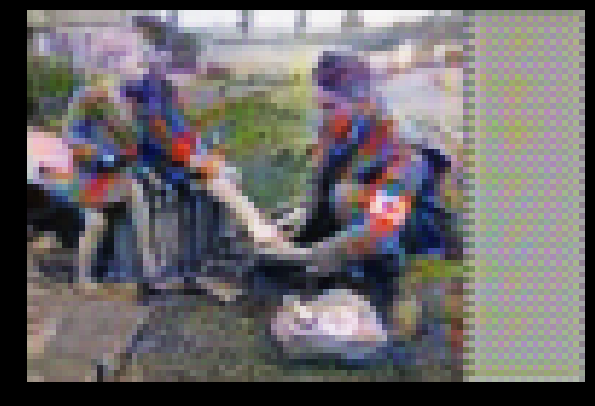

In [45]:
vis.plot_transformed_image("data/uploaded_images/soldier_kids.jpg", netG, md.val_ds, tfms=x_tfms)

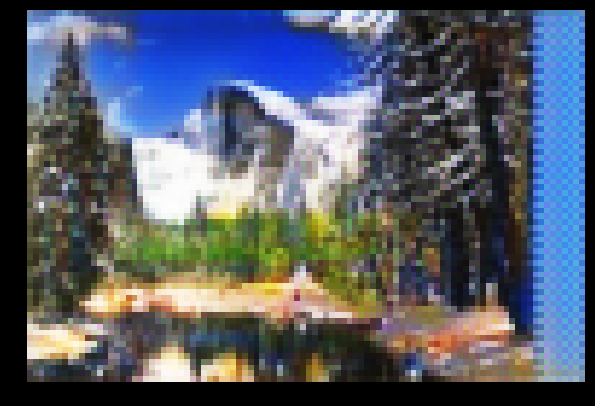

In [46]:
vis.plot_transformed_image("data/uploaded_images/AnselAdamsYosemite.jpg", netG, md.val_ds, tfms=x_tfms)

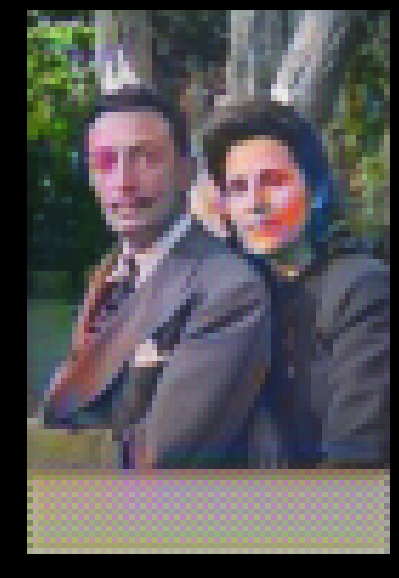

In [47]:
vis.plot_transformed_image("data/uploaded_images/unnamed.jpg", netG, md.val_ds, tfms=x_tfms)

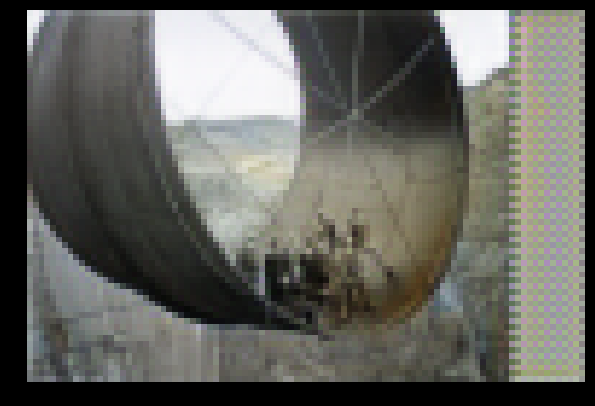

In [48]:
vis.plot_transformed_image("data/uploaded_images/workers_canyon.jpg", netG, md.val_ds, tfms=x_tfms)

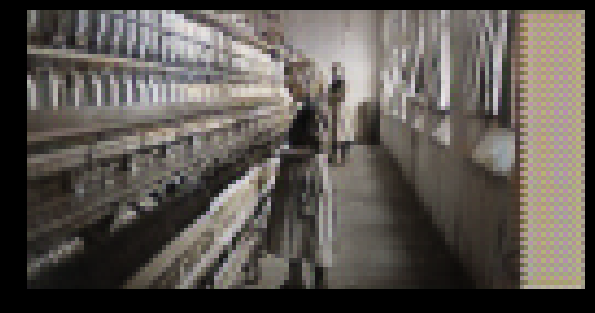

In [49]:
vis.plot_transformed_image("data/uploaded_images/CottonMill.jpg", netG, md.val_ds, tfms=x_tfms)

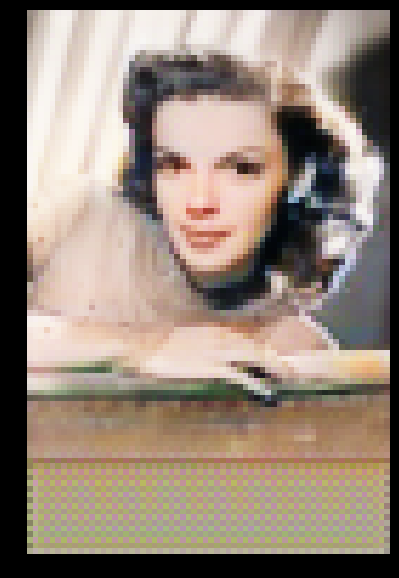

In [50]:
vis.plot_transformed_image("data/uploaded_images/JudyGarland.jpeg", netG, md.val_ds, tfms=x_tfms)

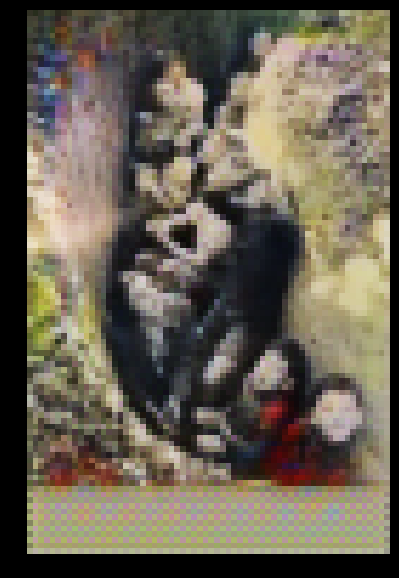

In [51]:
vis.plot_transformed_image("data/uploaded_images/kids_pit.jpg", netG, md.val_ds, tfms=x_tfms)

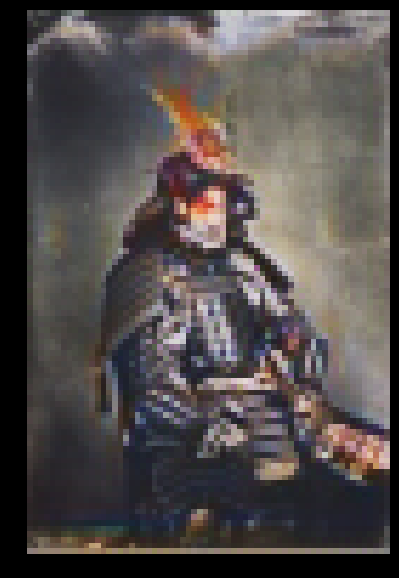

In [52]:
vis.plot_transformed_image("data/uploaded_images/last_samurai.jpg", netG, md.val_ds, tfms=x_tfms)

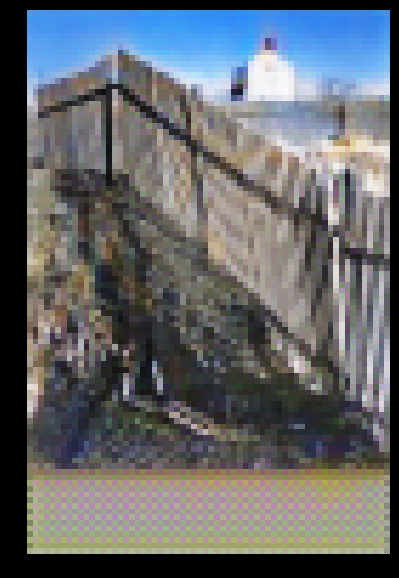

In [53]:
vis.plot_transformed_image("data/uploaded_images/AnselAdamsWhiteChurch.jpg", netG, md.val_ds, tfms=x_tfms)

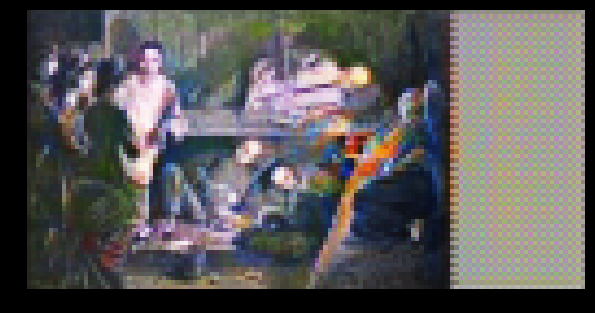

In [54]:
vis.plot_transformed_image("data/uploaded_images/opium.jpg", netG, md.val_ds, tfms=x_tfms)

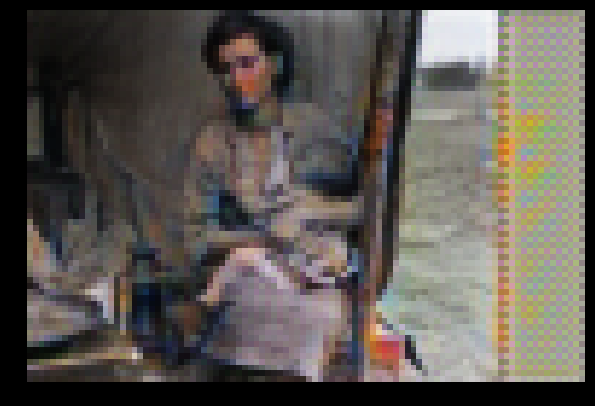

In [55]:
vis.plot_transformed_image("data/uploaded_images/dorothea_lange_2.jpg", netG, md.val_ds, tfms=x_tfms)

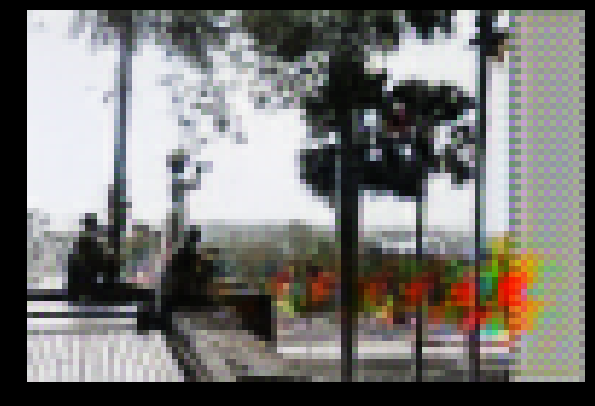

In [56]:
vis.plot_transformed_image("data/uploaded_images/rgs.jpg", netG, md.val_ds, tfms=x_tfms)

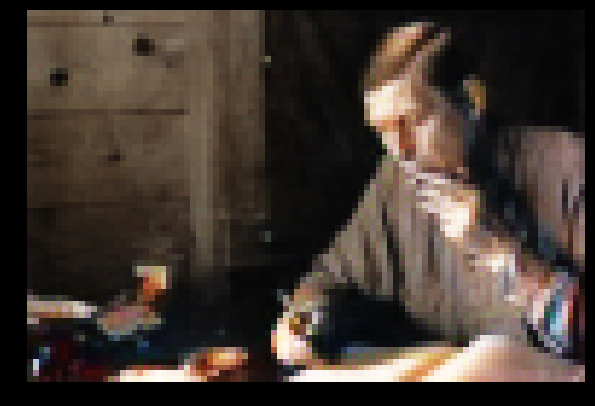

In [57]:
vis.plot_transformed_image("data/uploaded_images/wh-auden.jpg", netG, md.val_ds, tfms=x_tfms)

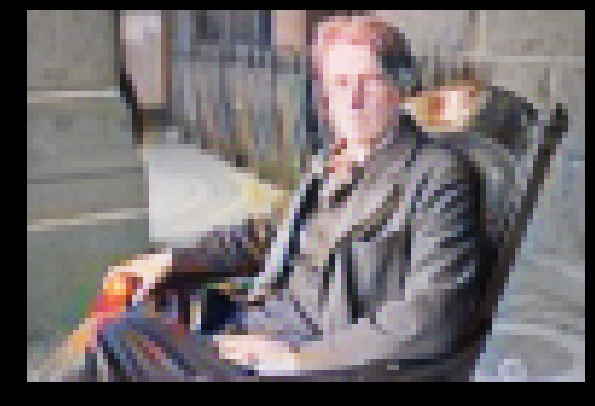

In [58]:
vis.plot_transformed_image("data/uploaded_images/w-b-yeats.jpg", netG, md.val_ds, tfms=x_tfms)

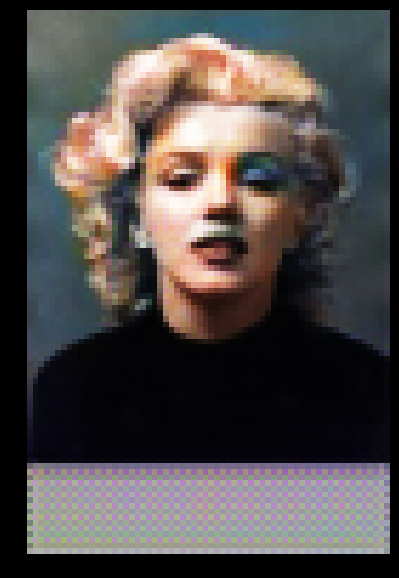

In [59]:
vis.plot_transformed_image("data/uploaded_images/marilyn_portrait.jpg", netG, md.val_ds, tfms=x_tfms)

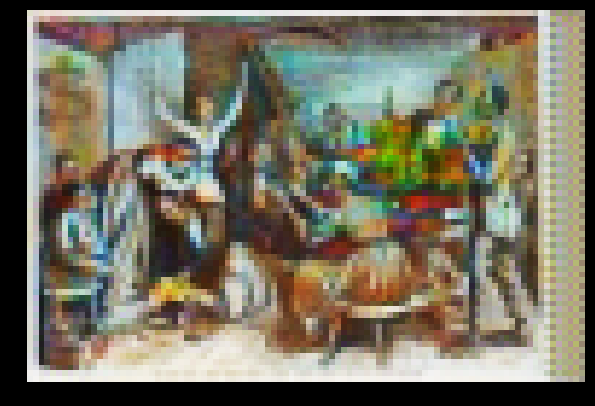

In [60]:
vis.plot_transformed_image("data/uploaded_images/wilson-slaverevivalmeeting.jpg", netG, md.val_ds, tfms=x_tfms)

In [ ]:
#vis.plot_transformed_image("data/uploaded_images/ww1_trench.jpg", netG, md.val_ds, tfms=x_tfms)